<a href="https://colab.research.google.com/github/ZinnunMalikov/Sleep-Deprivation-Ancillary/blob/main/Final_Sleep_Research_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
#Open The Link Below for a Full View:
#https://github.com/ZinnunMalikov/Sleep-Deprivation-Ancillary/blob/gh-pages/ancillary.md

from google.colab import files
uploaded = files.upload()

Saving 2015data.csv to 2015data (5).csv


In [93]:
import copy

#Create Standard Dev
def stan_dev(inp):
  mean = sum(inp)/len(inp)
  vari = 0
  for a in range(len(inp)):
    vari = vari + (1/(len(inp)-1))*(inp[a]-mean)*(inp[a]-mean)
  return(vari**0.5)

#Regression Function
def reg(inp1, inp2):
  mean1 = sum(inp1)/len(inp1)
  mean2 = sum(inp2)/len(inp2)
  vari1 = 0
  vari2 = 0
  for a in range(len(inp1)):
    vari1 = vari1 + (1/(len(inp1)-1))*(inp1[a]-mean1)*(inp1[a]-mean1)

  for a in range(len(inp1)):
    vari2 = vari2 + (1/(len(inp2)-1))*(inp2[a]-mean2)*(inp2[a]-mean2)

  std1 = vari1**0.5
  std2 = vari2**0.5

  r = 0
  for a in range(len(inp1)):
    r = r + (1/(len(inp1)-1))*(inp1[a]-mean1)*(inp2[a]-mean2)/(std1*std2)
  
  B = r*std2/std1
  A = mean2-mean1*B

  return [std1, std2, r, A, B]

#Five Number Summary
def five_sum(inp_li1):
  inp_li = copy.deepcopy(inp_li1)
  inp_li.sort()
  dnum = len(inp_li)

  if len(inp_li) % 2 == 1:
      median = inp_li[int((dnum + 1)/2 - 1)]
      lh = inp_li[0:int((dnum + 1)/2 - 1)]
      uh = inp_li[int((dnum+1)/2):]
  else:
      median = (inp_li[int(dnum/2) - 1] + inp_li[int(dnum/2)])/2
      lh = inp_li[0: int(dnum/2)]
      uh = inp_li[int(dnum/2):]


  if len(lh) % 2 == 1:
      q1 = lh[int((len(lh) + 1)/2 - 1)]
  else:
      q1 = (lh[int(len(lh)/2 - 1)] + lh[int(len(lh)/2)])/2

  if len(uh) % 2 == 1:
      q3 = uh[int((len(uh) + 1)/2 - 1)]
  else:
      q3 = (uh[int(len(uh)/2 - 1)] + uh[int(len(uh)/2)])/2

  iqr = q3 - q1
  return([min(inp_li), q1, median, q3, max(inp_li)])

#data fixing
def isNaN(ni):
  return ni != ni


In [94]:
import io
import numpy as np
import pandas as pd

#Convert raw data to a usable dataframe array
df_sleep = pd.read_csv(io.BytesIO(uploaded['2015data.csv']))
array_sleep = df_sleep.to_numpy()

In [95]:
#Create a list of average sleep
avg_weekdays = array_sleep[:, 39]
avg_weekends = array_sleep[:, 40]

for a in range(len(avg_weekdays)):
  if isNaN(avg_weekdays[a]) == True:
    avg_weekdays[a] = 411.45
  if isNaN(avg_weekends[a]) == True:
    avg_weekends[a] = 449.9
    
avg_total = list(np.add(avg_weekdays*5/(60*7), avg_weekends*2/(60*7)))
#print(avg_total)


[1.5357142857142858, 6.285714285714286, 7.0, 7.928571428571429, 12.75]
Standard Deviation: 1.2593518283610086


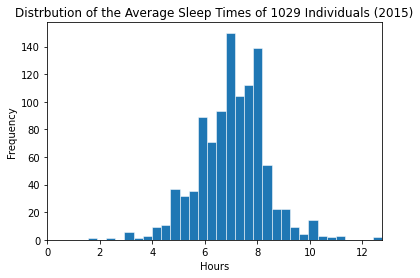

In [96]:
import matplotlib.pyplot as plt
import math

#Make data
x = avg_total

#Limits
xlow = min(avg_total)
xhigh = max(avg_total)

#Plot:
fig, ax = plt.subplots()

ax.hist(x, bins=32, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, xhigh))

plt.title("Distrbution of the Average Sleep Times of 1029 Individuals (2015)")
plt.xlabel("Hours")
plt.ylabel("Frequency")
print(five_sum(avg_total))
print("Standard Deviation: " + str(stan_dev(avg_total)))
plt.show()

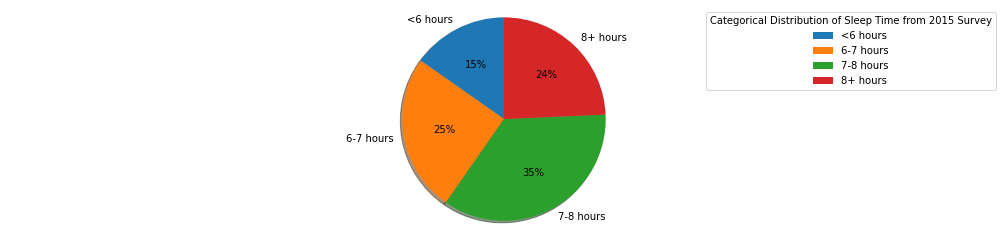

In [97]:
#Proportion of those who slept: (<6), (6-7), (7, 8), (8+) hours
p1 = 0
p2 = 0
p3 = 0
p4 = 0
for num in avg_total:
  if num < 6:
    p1 += 1
  elif num < 7:
    p2 += 1
  elif num < 8:
    p3 += 1
  else:
    p4 += 1

#Narrow Pie Chart
labels = ["<6 hours", "6-7 hours", "7-8 hours", "8+ hours"]
sizes = [p1, p2, p3, p4]
explode=[0,0,0,0]

plt.pie(sizes, autopct='%1.0f%%', explode=explode,labels=labels,shadow=True,startangle=90, )
plt.axis("equal")
plt.legend(title="Categorical Distribution of Sleep Time from 2015 Survey", loc = 'best')
plt.subplots_adjust(left=0.2, bottom=0.1, right=2.5)
plt.show()

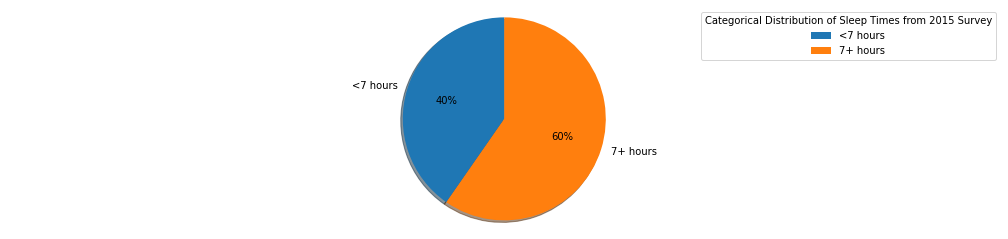

In [98]:
#Broad Pie Chart
labels = ["<7 hours", "7+ hours"]
sizes = [p1+p2, p3+p4]
explode=[0,0]

plt.pie(sizes, autopct='%1.0f%%', explode=explode,labels=labels,shadow=True,startangle=90, )
plt.axis("equal")
plt.legend(title="Categorical Distribution of Sleep Times from 2015 Survey", loc = 'best')
plt.subplots_adjust(left=0.2, bottom=0.1, right=2.5)
plt.show()

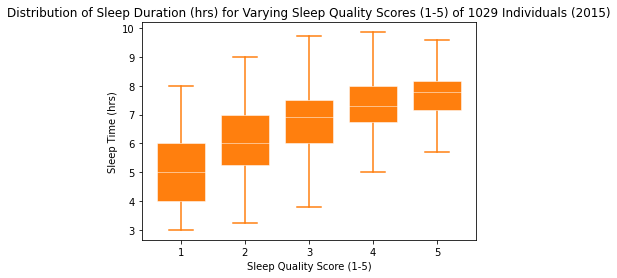

In [99]:
#Relationship between sleep duration and sleep quality
sleep_quality = array_sleep[:, 61]
sleep_quality = list(sleep_quality)

avg1 = []
avg2 = []
avg3 = []
avg4 = []
avg5 = []

for a in range(len(sleep_quality)):
  if sleep_quality[a] == 1:
    avg1.append(avg_total[a])
  if sleep_quality[a] == 2:
    avg2.append(avg_total[a])
  if sleep_quality[a] == 3:
    avg3.append(avg_total[a])
  if sleep_quality[a] == 4:
    avg4.append(avg_total[a])
  if sleep_quality[a] == 5:
    avg5.append(avg_total[a])

#Quantitative v. Categorical

# make data:
D = np.array([avg1, avg2, avg3, avg4, avg5], dtype=object)
labels = ["1", "2", "3", "4", "5"]

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, labels = labels, positions=[2, 4, 6, 8, 10], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C1", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C1", "linewidth": 1.5},
                capprops={"color": "C1", "linewidth": 1.5})
plt.xlabel("Sleep Quality Score (1-5)")
plt.ylabel("Sleep Time (hrs)")
plt.title("Distribution of Sleep Duration (hrs) for Varying Sleep Quality Scores (1-5) of 1029 Individuals (2015)")

plt.show()


In [100]:
#Chi Squared Test for Independence

#Observed Counts
r1c1 = []
r1c2 = []
r1c3 = []
r1c4 = []
r1c5 = []

r2c1 = []
r2c2 = []
r2c3 = []
r2c4 = []
r2c5 = []

r3c1 = []
r3c2 = []
r3c3 = []
r3c4 = []
r3c5 = []

r4c1 = []
r4c2 = []
r4c3 = []
r4c4 = []
r4c5 = []

row1 = [r1c1, r1c2, r1c3, r1c4, r1c5]
row2 = [r2c1, r2c2, r2c3, r2c4, r2c5]
row3 = [r3c1, r3c2, r3c3, r3c4, r3c5]
row4 = [r4c1, r4c2, r4c3, r4c4, r4c5]

for a in range(len(avg_total)):
  for b in range(len(row1)):
    if avg_total[a] < 6 and sleep_quality[a] == b+1:
      row1[b].append(a)
    if 6 <= avg_total[a] < 7 and sleep_quality[a] == b+1:
      row2[b].append(a)
    if 7 <= avg_total[a] < 8 and sleep_quality[a] == b+1:
      row3[b].append(a)
    if 8 <= avg_total[a] and sleep_quality[a] == b+1:
      row4[b].append(a)

for a in range(len(row1)):
  row1[a] = len(row1[a])
  row2[a] = len(row2[a])
  row3[a] = len(row3[a])
  row4[a] = len(row4[a])

two_way_tab = np.array([row1, row2, row3, row4])

row_sums = np.array([[sum(row1)], [sum(row2)], [sum(row3)], [sum(row4)], [1029]])

column_sums = np.array([np.add(np.add(np.add(np.array(row1), np.array(row2)), np.array(row3)), np.array(row4))])
two_way_tab = np.append(two_way_tab, column_sums, axis=0)
two_way_tab = np.append(two_way_tab, row_sums, axis=1)

two_way_df = pd.DataFrame(two_way_tab)
two_way_df.columns = ["1", "2", "3", "4", "5", "Total"]
two_way_df.index = ["<6 hrs", "6-7 hrs", "7-8 hrs", "8+ hours", "Total"]

print("Observed Counts for Relative Frequency of Sleep Quality (1-5) vs. Sleep Time (hrs)")
print(two_way_df)

#Expected Counts
two_way_tab2 = np.empty((4, 5), float)

row_sums_list = [sum(row1), sum(row2), sum(row3), sum(row4)]
column_sums_list = list(two_way_tab[4, 0:5])

for a in range(len(row_sums_list)):
  for b in range(len(column_sums_list)):
    two_way_tab2[a, b] = float(two_way_tab2[a, b])
    two_way_tab2[a, b] = np.around(float(row_sums_list[a]*column_sums_list[b]/1029), 3)

two_way_tab2 = np.append(two_way_tab2, column_sums, axis=0)
two_way_tab2 = np.append(two_way_tab2, row_sums, axis=1)

two_way_dfE = pd.DataFrame(two_way_tab2)
two_way_dfE.columns = ["1", "2", "3", "4", "5", "Total"]
two_way_dfE.index = ["<6 hrs", "6-7 hrs", "7-8 hrs", "8+ hours", "Total"]

print("")
print("Expected Counts for Relative Frequency of Sleep Quality (1-5) vs. Sleep Time (hrs)")
print(two_way_dfE)

Observed Counts for Relative Frequency of Sleep Quality (1-5) vs. Sleep Time (hrs)
           1   2    3    4    5  Total
<6 hrs    20  39   61   26   11    157
6-7 hrs    4  24  125   92   13    258
7-8 hrs    1  20  120  170   53    364
8+ hours   4   8   52  118   68    250
Total     29  91  358  406  145   1029

Expected Counts for Relative Frequency of Sleep Quality (1-5) vs. Sleep Time (hrs)
               1       2        3        4        5   Total
<6 hrs     4.425  13.884   54.622   61.946   22.123   157.0
6-7 hrs    7.271  22.816   89.761  101.796   36.356   258.0
7-8 hrs   10.259  32.190  126.639  143.619   51.293   364.0
8+ hours   7.046  22.109   86.978   98.639   35.228   250.0
Total     29.000  91.000  358.000  406.000  145.000  1029.0


In [101]:
#Chi Squared Test Statistic
#Note: One out of the twenty (5%) expected counts are under 5. However, for general purposes, the chi quared test can be continued

row_num, col_num = two_way_tab2.shape

chi_sq_stat = 0
for a in range(row_num - 1):
  for b in range(col_num - 1):
    partial = ((two_way_tab[a, b] - two_way_tab2[a, b])**2)/two_way_tab2[a, b]
    chi_sq_stat += partial

print("The chi-squared statistic for this test is: " + str(chi_sq_stat))

The chi-squared statistic for this test is: 235.6631248649211


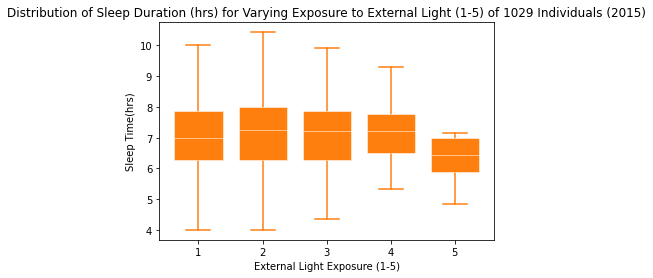

In [102]:
#Relationship Between Light Exposure (1-5) and Sleep Time (hrs)
light_exp = array_sleep[:, 98]
light_exp = list(light_exp)

lig1 = []
lig2 = []
lig3 = []
lig4 = []
lig5 = []

for a in range(len(light_exp)):
  if light_exp[a] == 1:
    lig1.append(avg_total[a])
  if light_exp[a] == 2:
    lig2.append(avg_total[a])
  if light_exp[a] == 3:
    lig3.append(avg_total[a])
  if light_exp[a] == 4:
    lig4.append(avg_total[a])
  if light_exp[a] == 5:
    lig5.append(avg_total[a])

#Quantitative v. Categorical

# make data:
D = np.array([lig1, lig2, lig3, lig4, lig5], dtype=object)
labels = ["1", "2", "3", "4", "5"]

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, labels = labels, positions=[2, 4, 6, 8, 10], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C1", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C1", "linewidth": 1.5},
                capprops={"color": "C1", "linewidth": 1.5})
plt.xlabel("External Light Exposure (1-5)")
plt.ylabel("Sleep Time(hrs)")
plt.title("Distribution of Sleep Duration (hrs) for Varying Exposure to External Light (1-5) of 1029 Individuals (2015)")
plt.show()

In [103]:
#Chi-Squared Test for Independence
#Observed Counts
for a in range(len(light_exp)):
  if isNaN(light_exp[a]) == True:
    light_exp[a] = 2

r1c1 = []
r1c2 = []
r1c3 = []
r1c4 = []
r1c5 = []

r2c1 = []
r2c2 = []
r2c3 = []
r2c4 = []
r2c5 = []

r3c1 = []
r3c2 = []
r3c3 = []
r3c4 = []
r3c5 = []

r4c1 = []
r4c2 = []
r4c3 = []
r4c4 = []
r4c5 = []

row1 = [r1c1, r1c2, r1c3, r1c4, r1c5]
row2 = [r2c1, r2c2, r2c3, r2c4, r2c5]
row3 = [r3c1, r3c2, r3c3, r3c4, r3c5]
row4 = [r4c1, r4c2, r4c3, r4c4, r4c5]

for a in range(len(avg_total)):
  for b in range(len(row1)):
    if avg_total[a] < 6 and light_exp[a] == b+1:
      row1[b].append(a)
    if 6 <= avg_total[a] < 7 and light_exp[a] == b+1:
      row2[b].append(a)
    if 7 <= avg_total[a] < 8 and light_exp[a] == b+1:
      row3[b].append(a)
    if 8 <= avg_total[a] and light_exp[a] == b+1:
      row4[b].append(a)

for a in range(len(row1)):
  row1[a] = len(row1[a])
  row2[a] = len(row2[a])
  row3[a] = len(row3[a])
  row4[a] = len(row4[a])

two_way_tab = np.array([row1, row2, row3, row4])

row_sums = np.array([[sum(row1)], [sum(row2)], [sum(row3)], [sum(row4)], [1026]])

column_sums = np.array([np.add(np.add(np.add(np.array(row1), np.array(row2)), np.array(row3)), np.array(row4))])
two_way_tab = np.append(two_way_tab, column_sums, axis=0)
two_way_tab = np.append(two_way_tab, row_sums, axis=1)

two_way_df = pd.DataFrame(two_way_tab)
two_way_df.columns = ["1", "2", "3", "4", "5", "Total"]
two_way_df.index = ["<6 hrs", "6-7 hrs", "7-8 hrs", "8+ hours", "Total"]

print("Observed Counts for Relative Frequency of External Light Exposure (1-5) vs. Sleep Time (hrs)")
print(two_way_df)

#Expected Counts
two_way_tab2 = np.empty((4, 5), float)

row_sums_list = [sum(row1), sum(row2), sum(row3), sum(row4)]
column_sums_list = list(two_way_tab[4, 0:5])

for a in range(len(row_sums_list)):
  for b in range(len(column_sums_list)):
    two_way_tab2[a, b] = float(two_way_tab2[a, b])
    two_way_tab2[a, b] = np.around(float(row_sums_list[a]*column_sums_list[b]/1026), 3)

two_way_tab2 = np.append(two_way_tab2, column_sums, axis=0)
two_way_tab2 = np.append(two_way_tab2, row_sums, axis=1)

two_way_dfE = pd.DataFrame(two_way_tab2)
two_way_dfE.columns = ["1", "2", "3", "4", "5", "Total"]
two_way_dfE.index = ["<6 hrs", "6-7 hrs", "7-8 hrs", "8+ hours", "Total"]

print("")
print("Expected Counts for Relative Frequency of Sleep Quality (1-5) vs. Sleep Time (hrs)")
print(two_way_dfE)

Observed Counts for Relative Frequency of External Light Exposure (1-5) vs. Sleep Time (hrs)
            1    2    3   4   5  Total
<6 hrs     84   44   22   3   4    157
6-7 hrs   136   75   34   7   6    258
7-8 hrs   178  119   48  14   4    363
8+ hours  124   89   32   3   0    248
Total     522  327  136  27  14   1026

Expected Counts for Relative Frequency of Sleep Quality (1-5) vs. Sleep Time (hrs)
                1        2        3       4       5   Total
<6 hrs     79.877   50.038   20.811   4.132   2.142   157.0
6-7 hrs   131.263   82.228   34.199   6.789   3.520   258.0
7-8 hrs   184.684  115.693   48.117   9.553   4.953   363.0
8+ hours  126.175   79.041   32.873   6.526   3.384   248.0
Total     522.000  327.000  136.000  27.000  14.000  1026.0


In [104]:
#Chi Squared Test Statistic
#Note: Four out of the twenty (20%) expected counts are under 5. For general purposes, the chi quared test will be continued, but we should be cautious of the results.

row_num, col_num = two_way_tab2.shape

chi_sq_stat = 0
for a in range(row_num - 1):
  for b in range(col_num - 1):
    partial = ((two_way_tab[a, b] - two_way_tab2[a, b])**2)/two_way_tab2[a, b]
    chi_sq_stat += partial

print("The chi-squared statistic for this test is: " + str(chi_sq_stat))

The chi-squared statistic for this test is: 14.687197372831275


Blue: Frequency of '1' responses
Orange: Frequency of '2' responses
Green: Frequency of '3' responses
Red: Frequency of '4' responses
Purple: Frequency of '5' responses



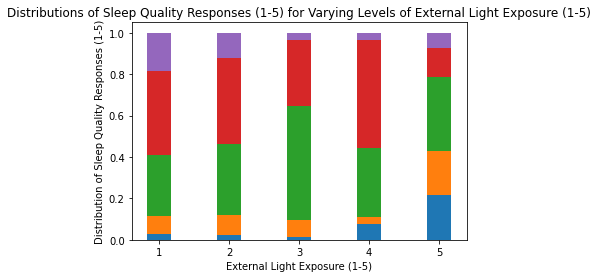

In [105]:
#Relationship Between Light Exposure and Sleep Quality
mlig1 = []
mlig2 = []
mlig3 = []
mlig4 = []
mlig5 = []

for a in range(len(light_exp)):
  if light_exp[a] == 1:
    mlig1.append(sleep_quality[a])
  if light_exp[a] == 2:
    mlig2.append(sleep_quality[a])
  if light_exp[a] == 3:
    mlig3.append(sleep_quality[a])
  if light_exp[a] == 4:
    mlig4.append(sleep_quality[a])
  if light_exp[a] == 5:
    mlig5.append(sleep_quality[a])

mlig1_summary = []
mlig2_summary = []
mlig3_summary = []
mlig4_summary = []
mlig5_summary = []

ml1s1, ml2s1, ml3s1, ml4s1, ml5s1 = 0, 0, 0, 0, 0
ml1s2, ml2s2, ml3s2, ml4s2, ml5s2 = 0, 0, 0, 0, 0
ml1s3, ml2s3, ml3s3, ml4s3, ml5s3 = 0, 0, 0, 0, 0
ml1s4, ml2s4, ml3s4, ml4s4, ml5s4 = 0, 0, 0, 0, 0
ml1s5, ml2s5, ml3s5, ml4s5, ml5s5 = 0, 0, 0, 0, 0

for a in range(len(mlig1)):
  if mlig1[a] == 1:
    ml1s1 += 1/len(mlig1)
  elif mlig1[a] == 2:
    ml2s1 += 1/len(mlig1)
  elif mlig1[a] == 3:
    ml3s1 += 1/len(mlig1)
  elif mlig1[a] == 4:
    ml4s1 += 1/len(mlig1)
  elif mlig1[a] == 5:
    ml5s1 += 1/len(mlig1)

for a in range(len(mlig2)):
  if mlig2[a] == 1:
    ml1s2 += 1/len(mlig2)
  elif mlig2[a] == 2:
    ml2s2 += 1/len(mlig2)
  elif mlig2[a] == 3:
    ml3s2 += 1/len(mlig2)
  elif mlig2[a] == 4:
    ml4s2 += 1/len(mlig2)
  elif mlig2[a] == 5:
    ml5s2 += 1/len(mlig2)

for a in range(len(mlig3)):
  if mlig3[a] == 1:
    ml1s3 += 1/len(mlig3)
  elif mlig3[a] == 2:
    ml2s3 += 1/len(mlig3)
  elif mlig3[a] == 3:
    ml3s3 += 1/len(mlig3)
  elif mlig3[a] == 4:
    ml4s3 += 1/len(mlig3)
  elif mlig3[a] == 5:
    ml5s3 += 1/len(mlig3)

for a in range(len(mlig4)):
  if mlig4[a] == 1:
    ml1s4 += 1/len(mlig4)
  elif mlig4[a] == 2:
    ml2s4 += 1/len(mlig4)
  elif mlig4[a] == 3:
    ml3s4 += 1/len(mlig4)
  elif mlig4[a] == 4:
    ml4s4 += 1/len(mlig4)
  elif mlig4[a] == 5:
    ml5s4 += 1/len(mlig4)

for a in range(len(mlig5)):
  if mlig5[a] == 1:
    ml1s5 += 1/len(mlig5)
  elif mlig5[a] == 2:
    ml2s5 += 1/len(mlig5)
  elif mlig5[a] == 3:
    ml3s5 += 1/len(mlig5)
  elif mlig5[a] == 4:
    ml4s5 += 1/len(mlig5)
  elif mlig5[a] == 5:
    ml5s5 += 1/len(mlig5)

#Categorical v. Categorical
labels = ['1', '2', '3', '4', '5']

g1 = [ml1s1, ml1s2, ml1s3, ml1s4, ml1s5]
g2 = [ml2s1, ml2s2, ml2s3, ml2s4, ml2s5]
g3 = [ml3s1, ml3s2, ml3s3, ml3s4, ml3s5]
g4 = [ml4s1, ml4s2, ml4s3, ml4s4, ml4s5]
g5 = [ml5s1, ml5s2, ml5s3, ml5s4, ml5s5]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, g1, width)
ax.bar(labels, g2, width, bottom = g1)
ax.bar(labels, g3, width, bottom = list(np.array(g1)+np.array(g2)))
ax.bar(labels, g4, width, bottom = list(np.array(g1)+np.array(g2)+np.array(g3)))
ax.bar(labels, g5, width, bottom = list(np.array(g1)+np.array(g2)+np.array(g3)+np.array(g4)))

ax.set_ylabel('Distribution of Sleep Quality Responses (1-5)')
ax.set_xlabel('External Light Exposure (1-5)')
ax.set_title('Distributions of Sleep Quality Responses (1-5) for Varying Levels of External Light Exposure (1-5)')

print("Blue: Frequency of '1' responses") 
print("Orange: Frequency of '2' responses")
print("Green: Frequency of '3' responses") 
print("Red: Frequency of '4' responses")
print("Purple: Frequency of '5' responses") 
print('')
plt.show()




In [106]:
#Chi Squared Test for Independence

r1c1 = []
r1c2 = []
r1c3 = []
r1c4 = []
r1c5 = []

r2c1 = []
r2c2 = []
r2c3 = []
r2c4 = []
r2c5 = []

r3c1 = []
r3c2 = []
r3c3 = []
r3c4 = []
r3c5 = []

r4c1 = []
r4c2 = []
r4c3 = []
r4c4 = []
r4c5 = []

r5c1 = []
r5c2 = []
r5c3 = []
r5c4 = []
r5c5 = []

row1 = [r1c1, r1c2, r1c3, r1c4, r1c5]
row2 = [r2c1, r2c2, r2c3, r2c4, r2c5]
row3 = [r3c1, r3c2, r3c3, r3c4, r3c5]
row4 = [r4c1, r4c2, r4c3, r4c4, r4c5]
row5 = [r5c1, r5c2, r5c3, r5c4, r5c5]

for a in range(len(sleep_quality)):
  for b in range(len(row1)):
    if sleep_quality[a] == 1 and light_exp[a] == b+1:
      row1[b].append(a)
    if sleep_quality[a] == 2 and light_exp[a] == b+1:
      row2[b].append(a)
    if sleep_quality[a] == 3 and light_exp[a] == b+1:
      row3[b].append(a)
    if sleep_quality[a] == 4 and light_exp[a] == b+1:
      row4[b].append(a)
    if sleep_quality[a] == 5 and light_exp[a] == b+1:
      row5[b].append(a)

for a in range(len(row1)):
  row1[a] = len(row1[a])
  row2[a] = len(row2[a])
  row3[a] = len(row3[a])
  row4[a] = len(row4[a])
  row5[a] = len(row5[a])

two_way_tab = np.array([row1, row2, row3, row4, row5])

row_sums = np.array([[sum(row1)], [sum(row2)], [sum(row3)], [sum(row4)], [sum(row5)], [1026]])

column_sums = np.array([np.add(np.add(np.add(np.add(np.array(row1), np.array(row2)), np.array(row3)), np.array(row4)), np.array(row5))])
two_way_tab = np.append(two_way_tab, column_sums, axis=0)
two_way_tab = np.append(two_way_tab, row_sums, axis=1)

two_way_df = pd.DataFrame(two_way_tab)
two_way_df.columns = ["L1", "L2", "L3", "L4", "L5", "Total"]
two_way_df.index = ["1", "2", "3", "4","5", "Total"]

print("Observed Counts for Relative Frequency of Sleep Quality (1-5) vs. External Light Exposure (1-5)")
print(two_way_df)

#Expected Counts
two_way_tab2 = np.empty((5, 5), float)

row_sums_list = [sum(row1), sum(row2), sum(row3), sum(row4), sum(row5)]
column_sums_list = list(two_way_tab[5, 0:5])

for a in range(len(row_sums_list)):
  for b in range(len(column_sums_list)):
    two_way_tab2[a, b] = float(two_way_tab2[a, b])
    two_way_tab2[a, b] = np.around(float(row_sums_list[a]*column_sums_list[b]/1026), 3)

two_way_tab2 = np.append(two_way_tab2, column_sums, axis=0)
two_way_tab2 = np.append(two_way_tab2, row_sums, axis=1)

two_way_dfE = pd.DataFrame(two_way_tab2)
two_way_dfE.columns = ["L1", "L2", "L3", "L4", "L5", "Total"]
two_way_dfE.index = ["1", "2", "3", "4","5", "Total"]

print("")
print("Expected Counts for Relative Frequency of Sleep Quality (1-5) vs. External Light Exposure (1-5)")
print(two_way_dfE)


Observed Counts for Relative Frequency of Sleep Quality (1-5) vs. External Light Exposure (1-5)
        L1   L2   L3  L4  L5  Total
1       15    7    2   2   3     29
2       44   32   11   1   3     91
3      155  112   75   9   5    356
4      211  136   43  14   2    406
5       97   40    5   1   1    144
Total  522  327  136  27  14   1026

Expected Counts for Relative Frequency of Sleep Quality (1-5) vs. External Light Exposure (1-5)
            L1       L2       L3      L4      L5   Total
1       14.754    9.243    3.844   0.763   0.396    29.0
2       46.298   29.003   12.062   2.395   1.242    91.0
3      181.123  113.462   47.189   9.368   4.858   356.0
4      206.561  129.398   53.817  10.684   5.540   406.0
5       73.263   45.895   19.088   3.789   1.965   144.0
Total  522.000  327.000  136.000  27.000  14.000  1026.0


In [108]:
#Chi Squared Test Statistic
#Note: Eight out of the twenty (40%) expected counts are under 5. Be cautious of the following results.

row_num, col_num = two_way_tab2.shape

chi_sq_stat = 0
for a in range(row_num - 1):
  for b in range(col_num - 1):
    partial = ((two_way_tab[a, b] - two_way_tab2[a, b])**2)/two_way_tab2[a, b]
    chi_sq_stat += partial

print("The chi-squared statistic for this test is: " + str(chi_sq_stat))

The chi-squared statistic for this test is: 71.8455958459828


Blue: Frequency of '1' responses for sleep quality
Orange: Frequency of '2' responses for sleep quality
Green: Frequency of '3' responses for sleep quality
Red: Frequency of '4' responses for sleep quality
Purple: Frequency of '5' responses for sleep quality



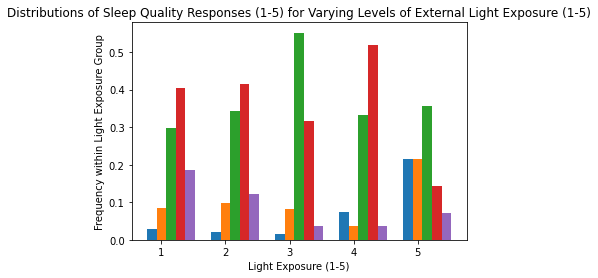

In [109]:
#Multiple Bar Charts Representation

N = 5
ind = np.arange(N) 
width = 0.15
  
bar1 = plt.bar(ind, g1, width)  
bar2 = plt.bar(ind+width, g2, width)
bar3 = plt.bar(ind+width*2, g3, width)
bar4 = plt.bar(ind+width*3, g4, width)
bar5 = plt.bar(ind+width*4, g5, width)
  
  
plt.xticks(ind+width,['1', '2', '3', '4', '5'])

plt.xlabel('Light Exposure (1-5)')
plt.ylabel('Frequency within Light Exposure Group')
plt.title('Distributions of Sleep Quality Responses (1-5) for Varying Levels of External Light Exposure (1-5)')

print("Blue: Frequency of '1' responses for sleep quality") 
print("Orange: Frequency of '2' responses for sleep quality")
print("Green: Frequency of '3' responses for sleep quality") 
print("Red: Frequency of '4' responses for sleep quality")
print("Purple: Frequency of '5' responses for sleep quality") 
print('')
plt.show()


Standard Deviation: 1.5274188227084846


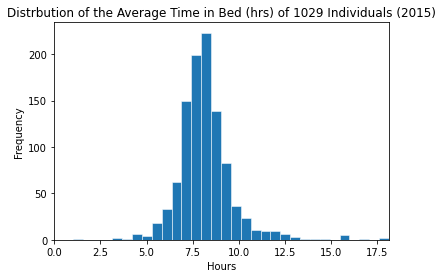

In [110]:
#Ratio of Sleep Time to Time in Bed
bed_week = array_sleep[:, 25]
bed_weekend = array_sleep[:, 33]

for a in range(len(bed_week)):
  if isNaN(bed_week[a]) == True:
    bed_week[a] = 475.3
  if isNaN(bed_weekend[a]) == True:
    bed_weekend[a] = 524.25

avg_bed = list(np.add(bed_week*5/(60*7), bed_weekend*2/(60*7)))

#Make data
x = avg_bed

#Limits
xlow = min(avg_bed)
xhigh = max(avg_bed)

#Plot:
fig, ax = plt.subplots()

ax.hist(x, bins=32, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, xhigh))

plt.title("Distrbution of the Average Time in Bed (hrs) of 1029 Individuals (2015)")
plt.xlabel("Hours")
plt.ylabel("Frequency")
print("Standard Deviation: " + str(stan_dev(avg_bed)))

plt.show()

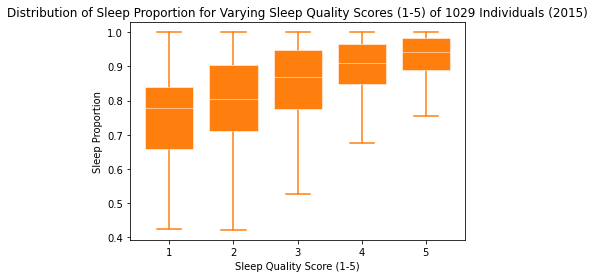

In [111]:
#Ratio of Estimated Actual Sleep Time to Time in Bed
ratio_sb = np.divide(avg_total, avg_bed)
ratio_sb=list(ratio_sb)

#Account for Discrepancy from Estimation
for a in range(len(ratio_sb)):
  if ratio_sb[a] > 1:
    ratio_sb[a] = 1

avg1 = []
avg2 = []
avg3 = []
avg4 = []
avg5 = []

for a in range(len(sleep_quality)):
  if sleep_quality[a] == 1:
    avg1.append(ratio_sb[a])
  if sleep_quality[a] == 2:
    avg2.append(ratio_sb[a])
  if sleep_quality[a] == 3:
    avg3.append(ratio_sb[a])
  if sleep_quality[a] == 4:
    avg4.append(ratio_sb[a])
  if sleep_quality[a] == 5:
    avg5.append(ratio_sb[a])

#Quantitative v. Categorical
# make data:
D = np.array([avg1, avg2, avg3, avg4, avg5], dtype=object)
labels = ["1", "2", "3", "4", "5"]

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, labels = labels, positions=[2, 4, 6, 8, 10], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C1", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C1", "linewidth": 1.5},
                capprops={"color": "C1", "linewidth": 1.5})
plt.xlabel("Sleep Quality Score (1-5)")
plt.ylabel("Sleep Proportion")
plt.title("Distribution of Sleep Proportion for Varying Sleep Quality Scores (1-5) of 1029 Individuals (2015)")

plt.show()

In [112]:
#Chi Squared Test for Independence

#Observed Counts
r1c1 = []
r1c2 = []
r1c3 = []
r1c4 = []
r1c5 = []

r2c1 = []
r2c2 = []
r2c3 = []
r2c4 = []
r2c5 = []

r3c1 = []
r3c2 = []
r3c3 = []
r3c4 = []
r3c5 = []

r4c1 = []
r4c2 = []
r4c3 = []
r4c4 = []
r4c5 = []

row1 = [r1c1, r1c2, r1c3, r1c4, r1c5]
row2 = [r2c1, r2c2, r2c3, r2c4, r2c5]
row3 = [r3c1, r3c2, r3c3, r3c4, r3c5]
row4 = [r4c1, r4c2, r4c3, r4c4, r4c5]

for a in range(len(ratio_sb)):
  for b in range(len(row1)):
    if ratio_sb[a] < 0.6 and sleep_quality[a] == b+1:
      row1[b].append(a)
    if 0.6 <= ratio_sb[a] < 0.7 and sleep_quality[a] == b+1:
      row2[b].append(a)
    if 0.7 <= ratio_sb[a] < 0.8 and sleep_quality[a] == b+1:
      row3[b].append(a)
    if 0.8 <= ratio_sb[a] and sleep_quality[a] == b+1:
      row4[b].append(a)

for a in range(len(row1)):
  row1[a] = len(row1[a])
  row2[a] = len(row2[a])
  row3[a] = len(row3[a])
  row4[a] = len(row4[a])

two_way_tab = np.array([row1, row2, row3, row4])

row_sums = np.array([[sum(row1)], [sum(row2)], [sum(row3)], [sum(row4)], [1029]])

column_sums = np.array([np.add(np.add(np.add(np.array(row1), np.array(row2)), np.array(row3)), np.array(row4))])
two_way_tab = np.append(two_way_tab, column_sums, axis=0)
two_way_tab = np.append(two_way_tab, row_sums, axis=1)

two_way_df = pd.DataFrame(two_way_tab)
two_way_df.columns = ["1", "2", "3", "4", "5", "Total"]
two_way_df.index = ["<6 hrs", "6-7 hrs", "7-8 hrs", "8+ hours", "Total"]

print("Observed Counts for Relative Frequency of Sleep Quality (1-5) vs. Sleep Proportion")
print(two_way_df)

#Expected Counts
two_way_tab2 = np.empty((4, 5), float)

row_sums_list = [sum(row1), sum(row2), sum(row3), sum(row4)]
column_sums_list = list(two_way_tab[4, 0:5])

for a in range(len(row_sums_list)):
  for b in range(len(column_sums_list)):
    two_way_tab2[a, b] = float(two_way_tab2[a, b])
    two_way_tab2[a, b] = np.around(float(row_sums_list[a]*column_sums_list[b]/1029), 3)

two_way_tab2 = np.append(two_way_tab2, column_sums, axis=0)
two_way_tab2 = np.append(two_way_tab2, row_sums, axis=1)

two_way_dfE = pd.DataFrame(two_way_tab2)
two_way_dfE.columns = ["1", "2", "3", "4", "5", "Total"]
two_way_dfE.index = ["<0.6", "0.6-0.7", "0.7-0.8", "0.8+", "Total"]

print("")
print("Expected Counts for Relative Frequency of Sleep Quality (1-5) vs. Sleep Proportion")
print(two_way_dfE)

Observed Counts for Relative Frequency of Sleep Quality (1-5) vs. Sleep Proportion
           1   2    3    4    5  Total
<6 hrs     5  10   12   10    3     40
6-7 hrs    4  10   28   12    2     56
7-8 hrs    8  20   78   35    4    145
8+ hours  12  51  240  349  136    788
Total     29  91  358  406  145   1029

Expected Counts for Relative Frequency of Sleep Quality (1-5) vs. Sleep Proportion
              1       2        3        4        5   Total
<0.6      1.127   3.537   13.916   15.782    5.637    40.0
0.6-0.7   1.578   4.952   19.483   22.095    7.891    56.0
0.7-0.8   4.086  12.823   50.447   57.211   20.432   145.0
0.8+     22.208  69.687  274.154  310.912  111.040   788.0
Total    29.000  91.000  358.000  406.000  145.000  1029.0


In [113]:
#Chi Squared Test Statistic
#Note: Four out of the twenty (20%) expected counts are under 5. For general purposes, the chi quared test will be continued, but we should be cautious of the results.

row_num, col_num = two_way_tab2.shape

chi_sq_stat = 0
for a in range(row_num - 1):
  for b in range(col_num - 1):
    partial = ((two_way_tab[a, b] - two_way_tab2[a, b])**2)/two_way_tab2[a, b]
    chi_sq_stat += partial

print("The chi-squared statistic for this test is: " + str(chi_sq_stat))

The chi-squared statistic for this test is: 119.219445429627


LSRL: y = 2.477111181612429 + 5.262424688649582x
r = 0.5288522318690922
Sx: 0.1265597257047017
Sy: 1.2593518283610086


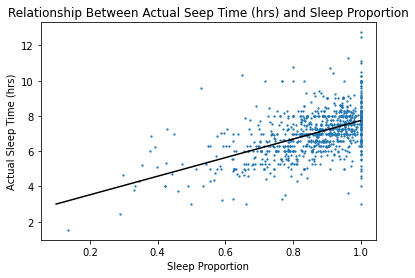

In [114]:
#Relationship Between Actual Sleep Time (hrs) and Sleep Proportion
outpr = reg(ratio_sb, avg_total)
r, a, b = outpr[2], outpr[3], outpr[4]
x = np.linspace(0.1, 1, 100)
y = a + b*x
plt.scatter(ratio_sb, avg_total, s=1.5, alpha=1)
plt.plot(x, y, color = 'black')
plt.xlabel("Sleep Proportion")
plt.ylabel('Actual Sleep Time (hrs)')
plt.title('Relationship Between Actual Seep Time (hrs) and Sleep Proportion')

print("LSRL: y = " + str(a) + " + " + str(b) + "x")
print("r = " + str(r))
print("Sx: " + str(outpr[0]))
print("Sy: " + str(outpr[1]))
plt.show()

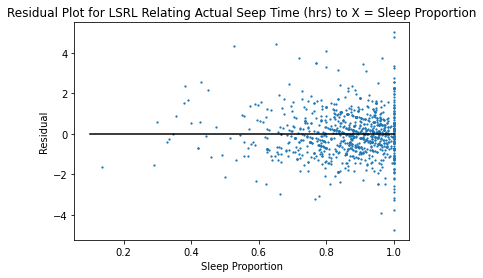

In [115]:
#Residual Plot
outpr = reg(ratio_sb, avg_total)
r, a, b = outpr[2], outpr[3], outpr[4]

resids = []
for l in range(len(ratio_sb)):
  calc = avg_total[l] - (a+b*ratio_sb[l])
  resids.append(calc)

x = np.linspace(0.1, 1, 100)
y = 0*x

plt.scatter(ratio_sb, resids, s=1.5, alpha=1)
plt.plot(x, y, color = 'black')
plt.xlabel("Sleep Proportion")
plt.ylabel('Residual')
plt.title('Residual Plot for LSRL Relating Actual Seep Time (hrs) to X = Sleep Proportion')
plt.show()

